In [166]:
import docx

# Load the Word document
doc = docx.Document("/Users/clementngatia/Downloads/1. Statistical Analysis/SIMS Masters Graduation Report_Class of 2025_Draft 1 (2).docx")

# Get all tables
tables = doc.tables
print(f"Found {len(tables)} tables.")

Found 12 tables.


In [167]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [168]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [169]:
table1 =  tables[0]
table1

In [170]:
import pandas as pd

def table_to_df(table):
    data = []
    for row in table.rows:
        data.append([cell.text.strip() for cell in row.cells])
    return pd.DataFrame(data)

# Loop through tables[1] to tables[15]
for i in range(1, 12):
    df = table_to_df(tables[i])
    df.columns = df.iloc[0]        # Set first row as header
    df = df[1:]                    # Remove header row from data
    df.reset_index(drop=True, inplace=True)
    globals()[f'df{i}'] = df       # Create df1, df2, ..., df15


In [184]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-6.1.2-py3-none-any.whl.metadata (6.9 kB)
  Using cached narwhals-1.43.0-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.1.2-py3-none-any.whl (16.3 MB)
Using cached narwhals-1.43.0-py3-none-any.whl (362 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.


In [171]:
total_graduands = df1
total_graduands = total_graduands.iloc[:10, :10]
total_graduands = total_graduands.loc[:, ~total_graduands.columns.duplicated()]
total_graduands = total_graduands.set_index('Class')
total_graduands.drop(columns=['Total'], inplace=True)
total_graduands


,MSc. Mathematical Finance & Risk Analytics,MSc. Statistical Science,MSc. Biomathematics,MSc. Data Science & Analytics
Class,,,,
2017,3,4,1,-
2018,9,1,0,-
2019,4,3,1,-
2020,1,5,0,-
2021,16,6,1,-
2022,5,10,1,-
2023,1,4,1,2
2024,10,6,-,38
2025,12,15,6,52


In [172]:
total_graduands.columns

Index(['MSc. Mathematical Finance & Risk Analytics',
       'MSc. Statistical Science', 'MSc. Biomathematics',
       'MSc. Data Science & Analytics'],
      dtype='object', name=0)

In [176]:
total_graduands = total_graduands.replace('-', 0)
total_graduands.iloc[:, 1:] = total_graduands.iloc[:, 1:].apply(pd.to_numeric)
total_graduands

,MSc. Mathematical Finance & Risk Analytics,MSc. Statistical Science,MSc. Biomathematics,MSc. Data Science & Analytics
Class,,,,
2017,3,4,1,0
2018,9,1,0,0
2019,4,3,1,0
2020,1,5,0,0
2021,16,6,1,0
2022,5,10,1,0
2023,1,4,1,2
2024,10,6,0,38
2025,12,15,6,52


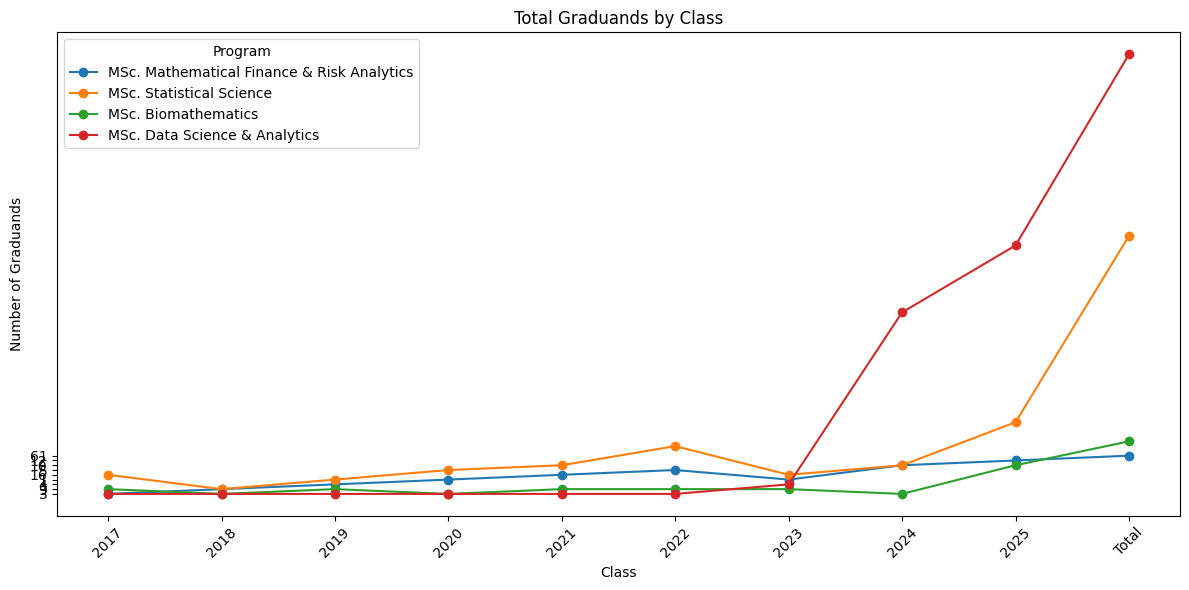

In [177]:
# Visualizatuon for the total graduands
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
for column in total_graduands.columns:
    plt.plot(total_graduands.index, total_graduands[column], marker='o', label=column)

plt.title('Total Graduands by Class')
plt.xlabel('Class')
plt.ylabel('Number of Graduands')
plt.xticks(rotation=45)
plt.legend(title='Program')
plt.tight_layout()
plt.show()

In [ ]:
intake_gender_2023 = df2
intake_gender_2023 = intake_gender_2023.iloc[:4, :3]
intake_gender_2023

,Program,Male Students,Female Students
0,Master of Science in Mathematical Finance & Ri...,3,5
1,Master of Science in Statistical Science,4,8
2,Master of Science in Biomathematics,3,4
3,Master of Science in Data Science and Analytics,39,36


In [178]:
intake_gender_2023 = intake_gender_2023.set_index('Program')
intake_gender_2023

,Male Students,Female Students
Program,,
Master of Science in Mathematical Finance & Risk Analytics,3,5
Master of Science in Statistical Science,4,8
Master of Science in Biomathematics,3,4
Master of Science in Data Science and Analytics,39,36


In [185]:
intake_gender_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Master of Science in Mathematical Finance & Risk Analytics to Master of Science in Data Science and Analytics
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Male Students    4 non-null      object
 1   Female Students  4 non-null      object
dtypes: object(2)
memory usage: 268.0+ bytes


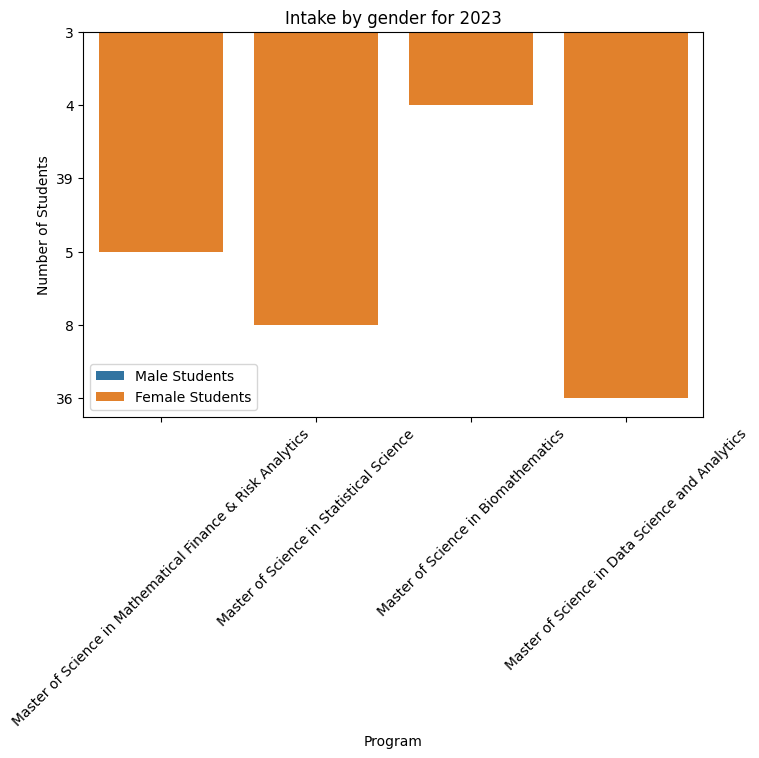

In [183]:
# creating a bar plor for intake_gender_2023
plt.figure(figsize=(8, 5))

for column in intake_gender_2023.columns:
    sns.barplot(data=intake_gender_2023, x='Program', y=column, label=column)

plt.title('Intake by gender for 2023')
plt.xlabel('Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend
plt.show()


In [ ]:
completion_rate_2022 = df3
completion_rate_2022 = completion_rate_2022.iloc[:4,]
completion_rate_2022

,Program,2022 Intake,No. of Students Graduating,Completion Rate
0,Master of Science in Mathematical Finance,8,2,25%
1,Master of Science in Statistical Science,12,7,58%
2,Master of Science in Biomathematics,7,6,86%
3,Master of Science in Data Science and Analytics,75,26,35%


In [ ]:
completion_rate_2023 = df4
completion_rate_2023 = completion_rate_2023.iloc[:4,]
completion_rate_2023

,Program,2023 Intake,Module V 2024,Students Graduating,Success Rate
0,Master of Science in Mathematical Finance & Ri...,8,8,2,25%
1,Master of Science in Statistical Science,12,11,7,64%
2,Master of Science in Biomathematics,7,7,6,86%
3,Master of Science in Data Science and Analytics,75,54,26,48%


In [ ]:
overall_graduands_2025 = df5
overall_graduands_2025 = overall_graduands_2025.iloc[:4, :]
overall_graduands_2025

,Program,2023 Intake,Backlog\n(previous Cohorts),Total,Percentage
0,Master of Science in Mathematical Finance & Ri...,2,10,12,14%
1,Master of Science in Statistical Science,7,8,15,18%
2,Master of Science in Biomathematics,6,-,6,7%
3,Master of Science in Data Science and Analytics,26,26,52,62%


In [ ]:
grads_2025_gender = df6
grads_2025_gender = grads_2025_gender.iloc[:4, :3]
grads_2025_gender.columns

Index(['Program', 'Male Graduands', 'Female Graduands'], dtype='object', name=0)

In [ ]:
msc_dsa_grad_list = df7
msc_dsa_grad_list = msc_dsa_grad_list.loc[:, ~msc_dsa_grad_list.columns.duplicated()]
msc_dsa_grad_list.set_index('S/No.', inplace=True)
msc_dsa_grad_list

,Student No,Student Names,Gender,Intake,Average Mark,Average Grade,GPA
S/No.,,,,,,,
1,147513,"AGONG, Norman Angel",Male,May-22,May-22,B,3.09
2,145613,"ASWANI, Allan Ademba",Male,May-21,May-21,A,3.46
3,169522,"BAARIU, Yvonne Makena",Female,May-23,May-23,B,3.1
4,100054,"BABU, Eddah Waruguru",Female,May-23,May-23,C,2.84
5,145110,"CHANN, Isaac Otieno",Male,May-21,May-21,B,3.16
6,169194,"CHEPKIRUI, Sharon Tonui",Female,May-23,May-23,A,3.7
7,169375,"CLAUDINE, Linda Wa Nciko",Female,May-23,May-23,B,3.19
8,148454,"EYINDA, Christine Lorraine",Female,May-23,May-23,A,3.75
9,149796,"GAMBO, Dawe David",Male,May-22,May-22,B,3.34


In [ ]:
pending_students_2023 =df8
pending_students_2023 = pending_students_2023.iloc[:4, :5]
pending_students_2023

,Program,2023 Intake,No. Graduating,Dropped out/ Transferred,Pending Students
0,Master of Science in Mathematical Finance,8,2,-,6
1,Master of Science in Statistical Science,12,7,-,5
2,Master of Science in Biomathematics,7,6,-,1
3,Master of Science in Data Science and Analytics,75,26,2,47


In [ ]:
df9.columns = df9.iloc[0, :].values
df9 = df9.iloc[1:]
print(df9)

msc_dsa_pending_current = df9

   S/No. Student Number               Student Details     No. of Pending Units
1      1         168213      Mureithi, Esther Wanjiku                   1 Unit
2      2         169406                 Amule, Edward                   1 Unit
3      3          80925        Ng'ang'a, Simon Kihara                  2 Units
4      4          69298             Wawire, Mercyline                  2 Units
5      5          96002          Gitonga, John Mwangi                  2 Units
6      6         150119          Theuri, John Gitonga                  2 Units
7      7         169116              Ngetich, Abraham                  2 Units
8      8         169124        Kigotho, Samuel Irungu                  2 Units
9      9         169126           Wabwoba, S. Abigail                  2 Units
10    10         169274           Orege, Ian Kesohore                  2 Units
11    11          61596     Kihang'a, Solomon Wabacha                  3 Units
12    12          95244         Kirwa, Cherono Brend

In [ ]:
df10

,S/No.,Student Number,Student Details,Class of,No. of Pending Units
0,1,151148,"Nderito, Kigen Gatere",2024,1 Unit (Dissertation)
1,2,149076,"Njogu, Charles Kabui",2024,1 unit (DSA 8302)
2,3,83303,"Ramadhan, Khidir Ismail",2024,2 Units
3,4,69139,"Awuor, Joyce Naomi",2024,4 Units
4,5,150684,"Waithera, Richard Kabiru",2024,5 Units
5,6,149978,"Gichuki, Michael Mwangi",2024,6 Units
6,7,050953,"Bodo, Joyce Anyango",2024,7 Units
7,8,78375,"Otieno, Billy Opiyo",2024,11 Units
8,9,151384,"Joseph, Anette Kerubo",2024,11 Units
9,10,148987,"Jaffery, Mwangi Ndisho",2024,13 Units


In [ ]:
df10.columns

Index(['S/No.', 'Student Number', 'Student Details', 'Class of',
       'No. of Pending Units'],
      dtype='object', name=0)

In [ ]:
backlog_2024 = df10

In [ ]:
df11 = df11.loc[:, ~df11.columns.duplicated()]

In [ ]:
df11

,16,145684,"Ndiritu, Timothy Wahome",2023,1 Unit (Dissertation)
0,17,144910,"Onyango, James Oduor",2023,1 Unit (Dissertation)
1,18,145052,"Mboya, Daisy Akinyi",2023,1 Unit (Dissertation)
2,19,145056,"Nguti, Lydia Mukii",2023,1 Unit (Dissertation)
3,20,145076,"Muninzwa, Donstefano Afubwa",2023,1 Unit (Dissertation)
4,21,71167,"Rugendo, Esther Muthoni",2023,1 Unit (Dissertation)
5,22,145111,"Makori, Joseph Orina",2023,1 Unit
6,23,144894,"Mugambi, Mike",2023,1 Unit
7,24,78052,"Simiyu, Barbara Lusike",2023,1Unit
8,25,106218,"Gichuhi, Getrude Gathoni",2023,2 Units
9,26,144896,"Juma, Joseph Matundura",2023,2 Units


In [ ]:
df11.loc[-1] = df11.columns           # Add current column names as a new row
df11.index = df11.index + 1          # Shift all existing rows down
df11 = df11.sort_index()
df11


/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_76621/1584415844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.loc[-1] = df11.columns           # Add current column names as a new row


,16,145684,"Ndiritu, Timothy Wahome",2023,1 Unit (Dissertation)
0,16,145684,"Ndiritu, Timothy Wahome",2023,1 Unit (Dissertation)
1,17,144910,"Onyango, James Oduor",2023,1 Unit (Dissertation)
2,18,145052,"Mboya, Daisy Akinyi",2023,1 Unit (Dissertation)
3,19,145056,"Nguti, Lydia Mukii",2023,1 Unit (Dissertation)
4,20,145076,"Muninzwa, Donstefano Afubwa",2023,1 Unit (Dissertation)
5,21,71167,"Rugendo, Esther Muthoni",2023,1 Unit (Dissertation)
6,22,145111,"Makori, Joseph Orina",2023,1 Unit
7,23,144894,"Mugambi, Mike",2023,1 Unit
8,24,78052,"Simiyu, Barbara Lusike",2023,1Unit
9,25,106218,"Gichuhi, Getrude Gathoni",2023,2 Units


In [ ]:
df11.columns = df10.columns
backlog_2023 = df11